# Q1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors 
import pandas as pd
import scipy.stats
import math
import random
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import sys
import seaborn as sns
from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans

%matplotlib inline

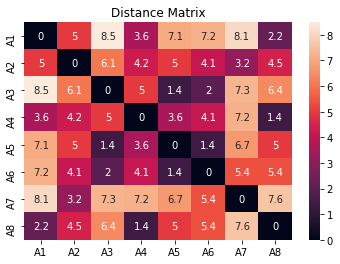

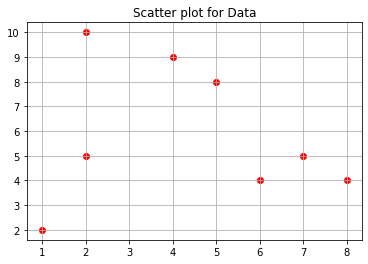

In [2]:
# A1=(2,10), A2=(2,5), A3=(8,4), A4=(5,8), A5=(7,5), A6=(6,4), A7=(1,2), A8=(4,9).
X = [2,2,8,5,7,6,1,4]
Y = [10,5,4,8,5,4,2,9]


label = ["A"+str(i+1) for i in range(8)]
dist = [[0 for i in range(8)] for j in range(8)]
for i in range(8):
  for j in range(i):
    tempDist = np.sqrt((X[i] - X[j])**2 + (Y[i] - Y[j])**2 )
    dist[i][j] = dist[j][i] = tempDist 


sns.heatmap(dist, xticklabels = label , yticklabels = label,annot= True )
plt.title('Distance Matrix')
plt.show()
print()
X =np.array([X,Y])
X=np.transpose(X)
plt.scatter(X[:,0],X[:,1],c="r")
plt.title('Scatter plot for Data')
plt.grid()
plt.show()


In [3]:
 
def kmeans_func(x_data,k, n_iter):
    # random_idx = np.random.choice(len(x_data ), k, replace=False)
    #Randomly allocate centroid points 
    # centroids = x_data[ random_idx, :] 
    centroids = [[2,10],[5,8],[1,2]]
    # print(centroids) 
    d_array = cdist(x_data, centroids ,'euclidean')
    ans = np.array([np.argmin(i) for i in d_array]) 
     
    for _ in range(n_iter): 
        centroids = []
        for random_idx in range(k): 
            temp = x_data[ans==random_idx].mean(axis=0) 
            centroids.append(temp)
 
        centroids = np.vstack(centroids)  
         
        d_array = cdist(x_data, centroids ,'euclidean')
        ans = np.array([np.argmin(i) for i in d_array])
    
    # scatter plot
    number_of_colors = k
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(number_of_colors)]
    labels=[]
    for j in range(k):
      labels.append("cluster"+str(j+1))
    plt.figure(figsize=(10,6))
    
    for i in range(len(x_data)):
      plt.scatter(x_data[i][0],x_data[i][1],c=color[ans[i]])
    plt.scatter(centroids[:,0],centroids[:,1],s=300,c='yellow',label='Centroids')
    plt.legend(labels,loc="lower right")
    plt.title("Scatter plot with "+str(k)+" clusters")
    
    plt.grid()
    plt.show()

    print(centroids)

    # find error
    error=0
    for i in range(len(x_data)):
        min_val= sys.maxsize
        for j in range(k):
            temp = (x_data[i][0]-centroids[j][0])**2 + (x_data[i][1]-centroids[j][1])**2
            min_val = min(min_val,temp)
        error = error + min_val
    
    return ans,error

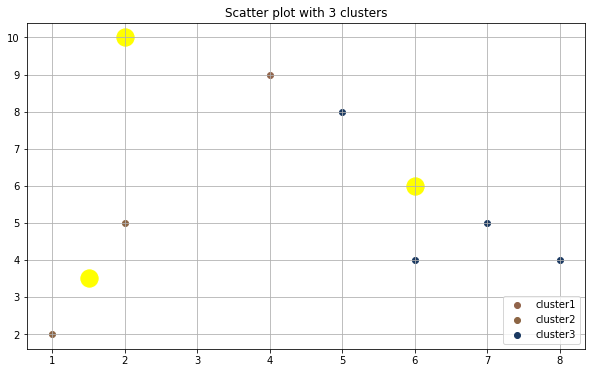

[[ 2.  10. ]
 [ 6.   6. ]
 [ 1.5  3.5]]



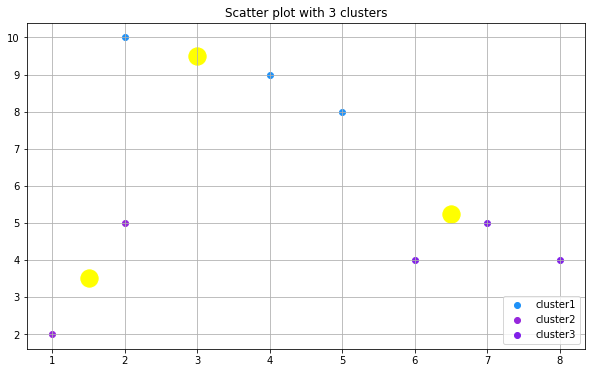

[[3.   9.5 ]
 [6.5  5.25]
 [1.5  3.5 ]]



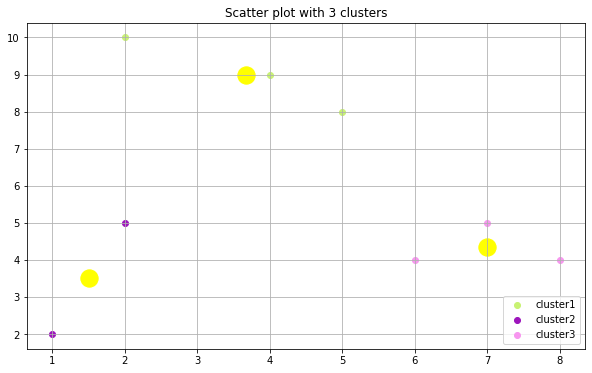

[[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]



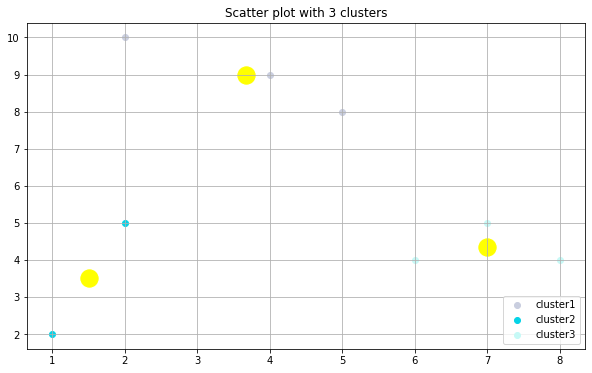

[[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]



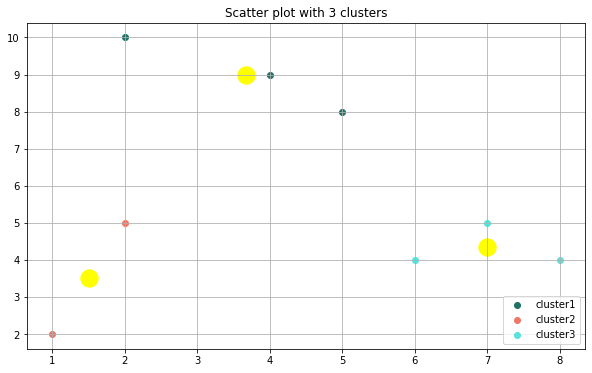

[[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]



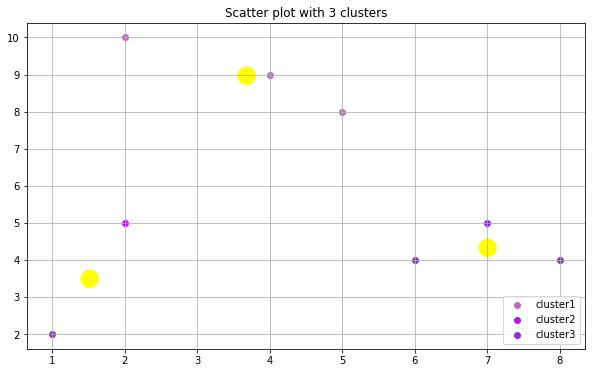

[[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]



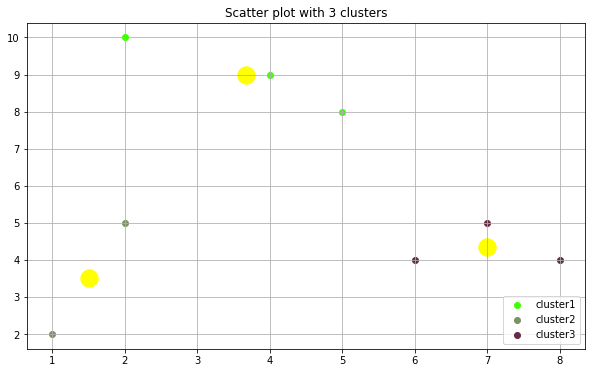

[[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]



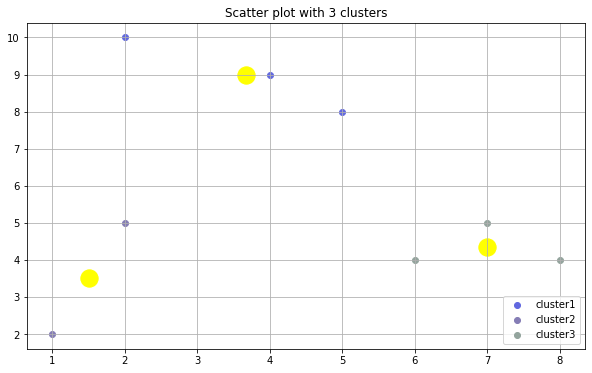

[[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]



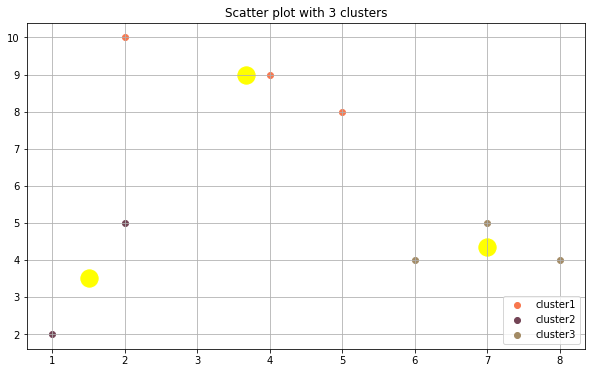

[[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]



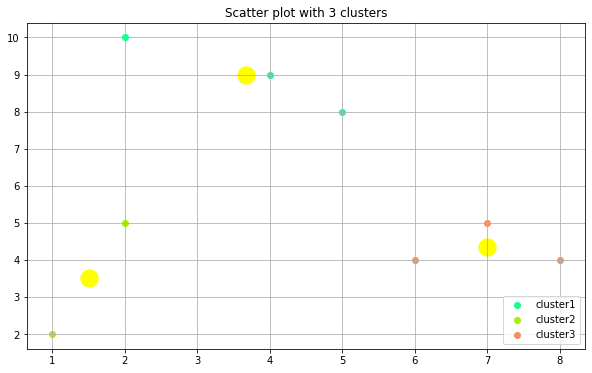

[[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]

[29.0, 19.6875, 14.333333333333332, 14.333333333333332, 14.333333333333332, 14.333333333333332, 14.333333333333332, 14.333333333333332, 14.333333333333332, 14.333333333333332]


In [4]:
sse_error=[]
for i in range(10):
  label,error = kmeans_func(X,3,i+1)
  sse_error.append(error) 
  print()
print(sse_error)

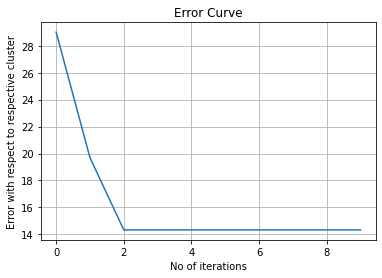

In [5]:
plt.plot(sse_error)
plt.xlabel('No of iterations')
plt.ylabel('Error with respect to respective cluster')
plt.grid()
plt.title('Error Curve')
plt.show()


# Q2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import mode
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


# Helper functions

In [3]:
def find_centroids(k,n):
    random.seed(5)
    idx=[]
    for i in range(k):
        idx.append(random.randint(0,n-1))
    return idx

In [4]:
def find_clusters(df,c,k,n):
    dist=[[] for _ in range(k)]
    for i in range(n):
        temp=[]
        for j in range(k):
            dist_temp= np.sum((df[i]-c[j])**2)
            temp.append(dist_temp)
        location=temp.index(min(temp))
        dist[location].append(i)
    return dist

In [5]:
def find_new_centroids(df,dist,c,k,m):
    for i in range(k):
      temp_mean=[0 for _ in range(m)]
    for j in range(len(dist[i])):
        id=dist[i][j]
        temp=0
        for kk in range(m):
            temp_mean[kk]+=df[id][kk]/len(dist[i])
    for j in range(m):
        c[i][j]=temp_mean[j]
    return c


In [6]:
def plot_2D(dist,df,c,k):
    plt.figure(figsize=[10,6])
    distx=[[] for i in range(k)]
    disty=[[] for i in range(k)]
    for i in range(k):
        for j in range(len(dist[i])):
            id=dist[i][j]
            distx[i].append(df[id][0])
            disty[i].append(df[id][1])
    cx=[];cy=[]
    for i in range(k):
        cx.append(c[i][0])
        cy.append(c[i][1])
        sns.scatterplot(distx[i],disty[i],markers='o',s=200)
    sns.scatterplot(cx,cy,color='.2',marker='*',s=400)
    plt.grid()
    plt.title('K='+str(k),fontsize=15)
    plt.xlabel('X',fontsize=15)
    plt.ylabel('Y',fontsize=15)
    

In [7]:
def k_means(df,k,plot):
    n=df.shape[0]
    m=df.shape[1]
    
    #indices of centroid
    idx=find_centroids(k,n)

    #to store the centroids kxm
    c=[[] for _ in range(k)]
    cprev=[[] for _ in range(k)]

    for i in range(k):
        for j in range(m):
            c[i].append(df[idx[i]][j])
            cprev[i].append(df[idx[i]][j])
    
    #to get the points in a given cluster kxdim
    #just store the indices in the original array
    dist=[[] for _ in range(k)]
    itr=0
    flag=False
    while flag==False and itr!=1000:
        
        #k clusters with elements in the cluster
        dist=find_clusters(df,c,k,n)
            
        #store previous centroids
        cprev=np.copy(c)

        #finding the new centroids
        c=find_new_centroids(df,dist,c,k,m)
        
        count=0
        for i in range(k):
            for j in range(len(c[0])):
                if c[i][j]==cprev[i][j]:
                    count+=1
        if count==k*len(c[0]):
            break
        itr+=1


    if plot==True:
        plot_2D(dist,df,c,k)

    return c,dist


In [8]:
def find_inertia(c,d,df):
    ans=0
    for i in range(len(c)):
        indices=d[i]
        for kk in range(len(indices)):
            for j in range(len(c[0])):
                ans+=(c[i][j]-df[indices[kk]][j])**2
    return ans

# Q2 a)

In [ ]:
data = pd.read_excel('Question2a.xlsx')
data.head()

x         y
0  1.842080  4.607572
1  5.658583  4.799964
2  6.352579  3.290854
3  2.904017  4.612204
4  3.231979  4.939894

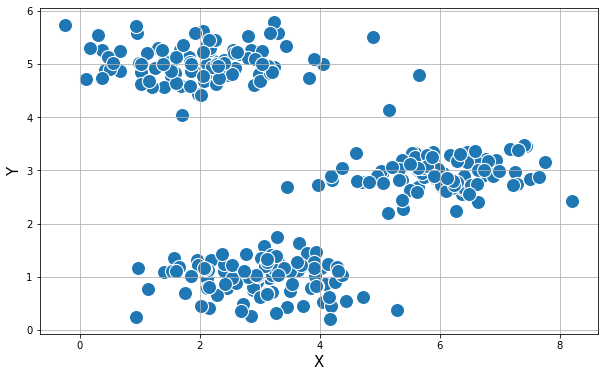

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data['x'],data['y'],s=200)
plt.xlabel('X',fontsize=15)
plt.ylabel('Y',fontsize=15)
plt.grid()

In [ ]:
# Standardize data
df=[]
df.append(data['x'])
df.append(data['y'])
df=np.array(df).transpose()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

##Our function

In [ ]:
# for i in range(1,11):
#   c_q1,dist_q1=k_means(df,i,True)

#Q2a 3) Visualize the cluster formation for each k

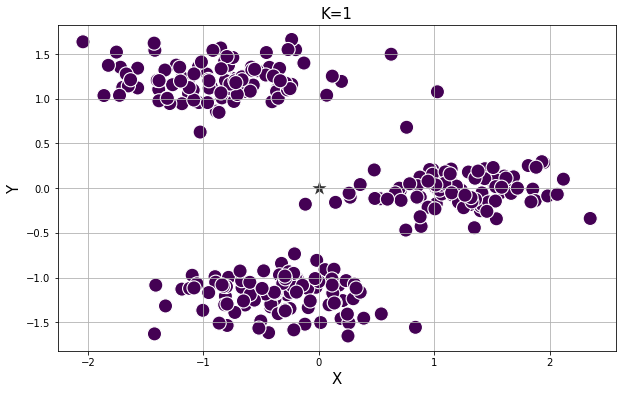

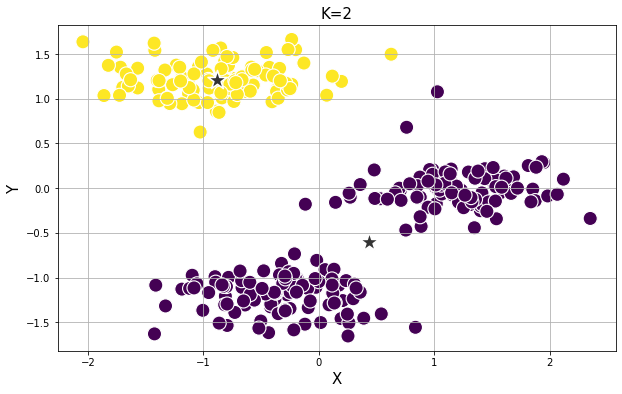

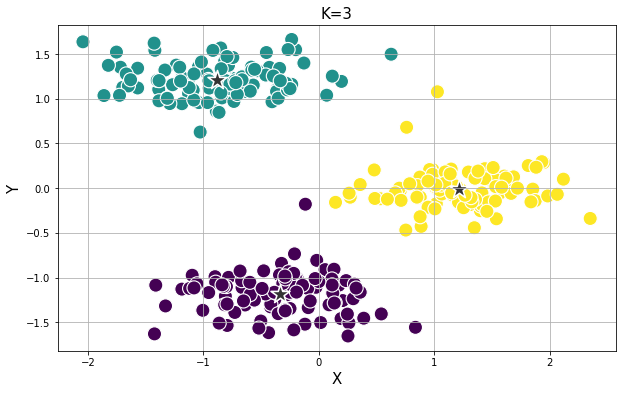

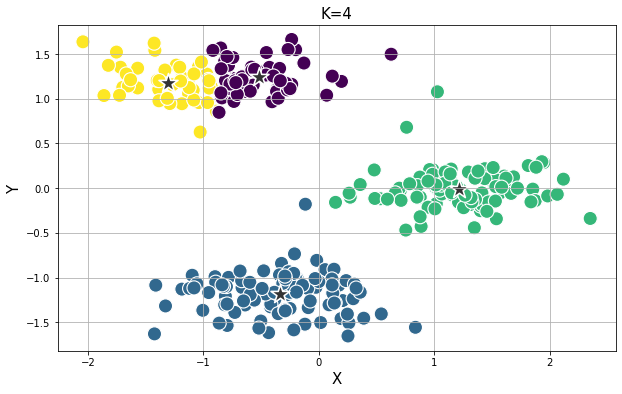

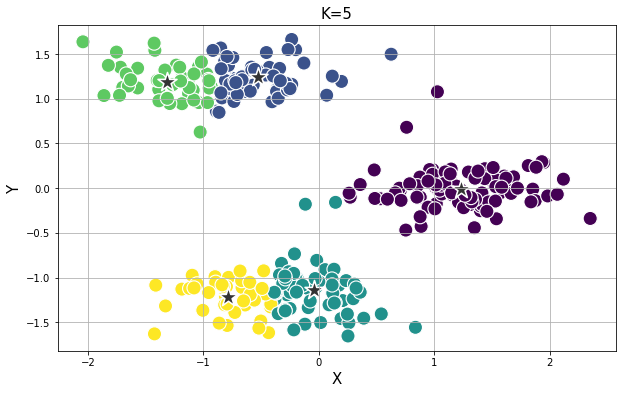

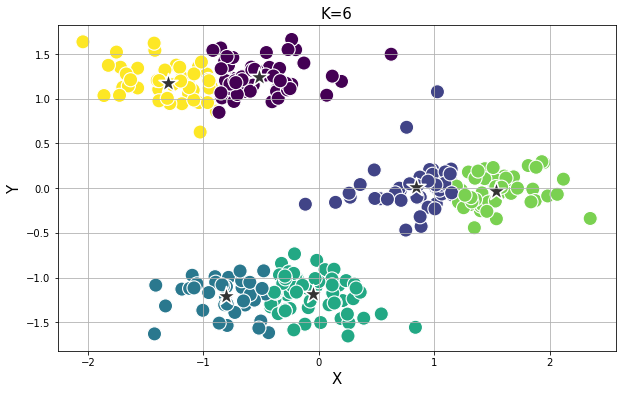

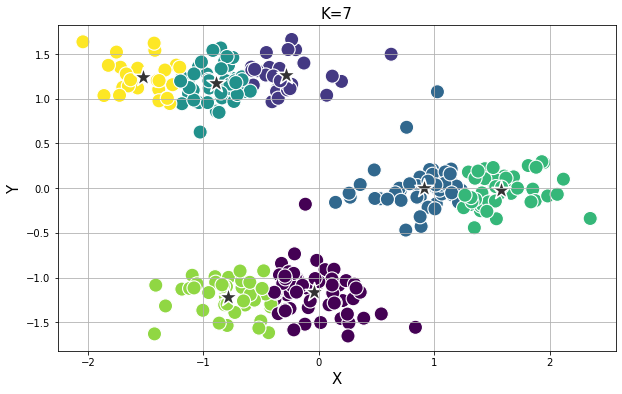

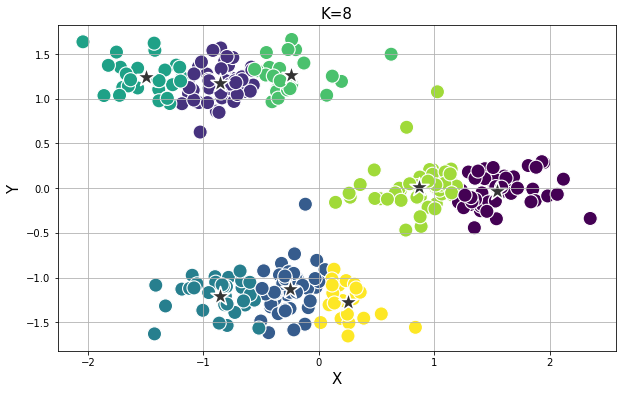

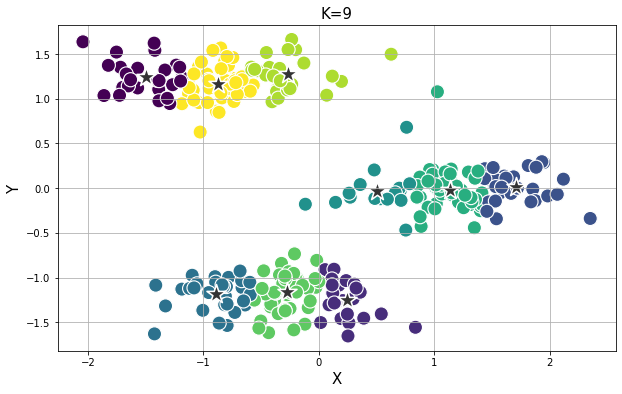

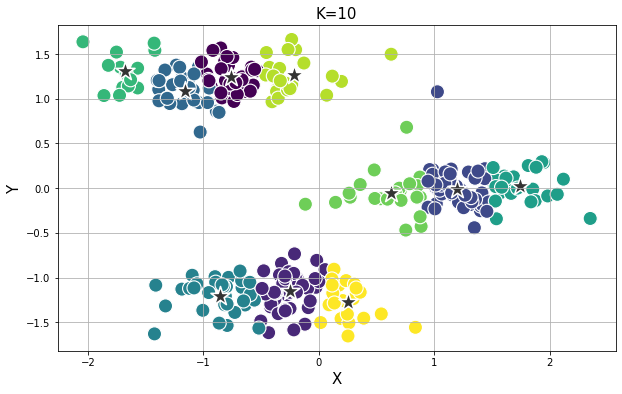

In [ ]:
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++')
  kmeans.fit(df_scaled)
  y_pred = kmeans.predict(df_scaled)
  
  # Creating plot
  plt.figure(figsize=[10,6])
  sns.scatterplot(df_scaled[:,0], df_scaled[:,1], c=y_pred, s=200)
  centers = kmeans.cluster_centers_
  sns.scatterplot(centers[:,0],centers[:,1],color='.2',marker='*',s=400)
  plt.grid()
  plt.title('K='+str(i),fontsize=15)
  plt.xlabel('X',fontsize=15)
  plt.ylabel('Y',fontsize=15)
  plt.show()
  

In [ ]:
# Calculate SSE
SSE_q2a_inbuilt=[]
n=11
for i in range(1,n):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(df_scaled)
    SSE_q2a_inbuilt.append(kmeans.inertia_)

#Q2a 4) Plot elbow curve

Text(0.5, 1.0, 'Elbow Curve')

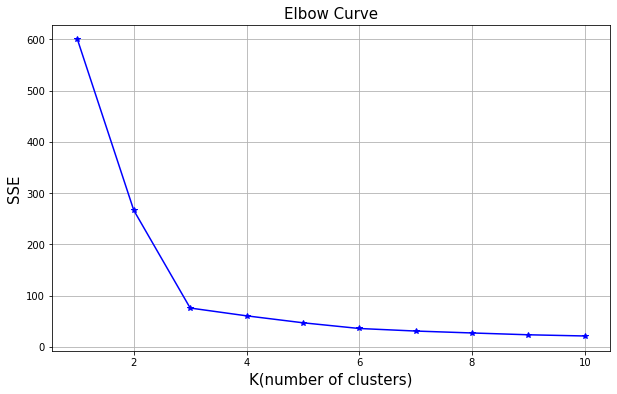

In [ ]:
x_axis=np.arange(1,11)
plt.figure(figsize=[10,6])
plt.plot(x_axis,SSE_q2a_inbuilt,'b-*')
plt.grid()
plt.ylabel('SSE',fontsize=15)
plt.xlabel('K(number of clusters)',fontsize=15)
plt.title('Elbow Curve',fontsize=15)

# Q2b

In [9]:
data2 = pd.read_excel('Question2b.xls')
data2.head()

x1         x2  y
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1

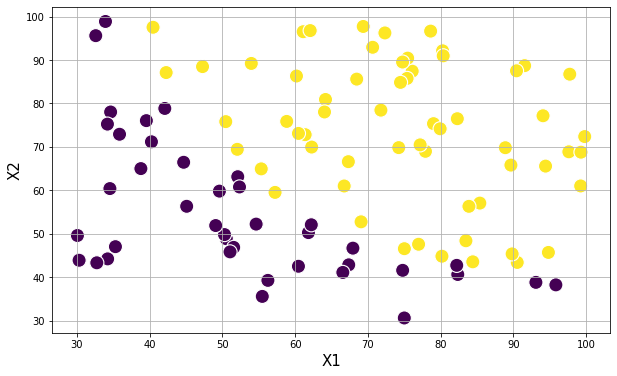

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data2['x1'],data2['x2'],s=200,c=data2['y'])
plt.xlabel('X1',fontsize=15)
plt.ylabel('X2',fontsize=15)
plt.grid()

In [14]:
# Standardize data
df2=[]
df2.append(data2['x1'])
df2.append(data2['x2'])
df2=np.array(df2).transpose()
scaler = StandardScaler()
df_scaled2 = scaler.fit_transform(df2)

#Q2b 3) Visualize the cluster formation for each k

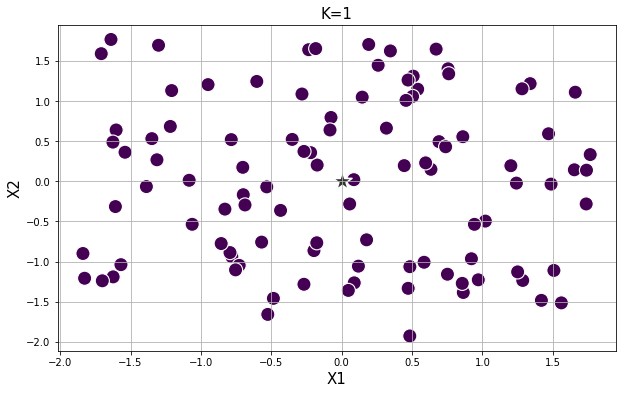

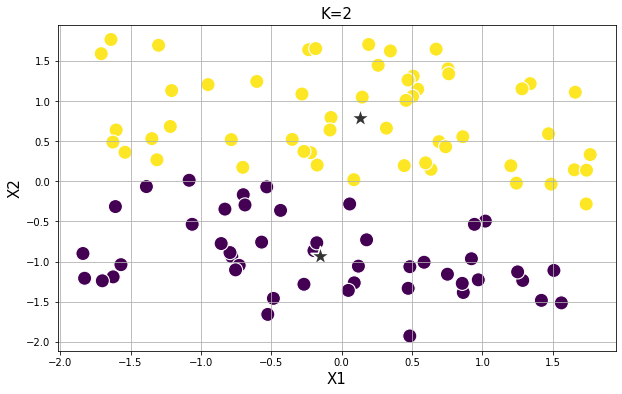

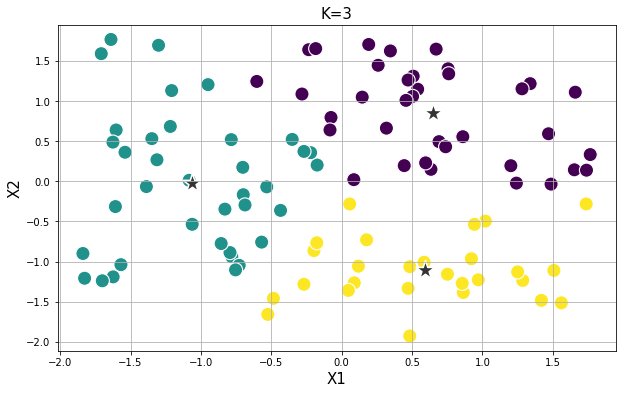

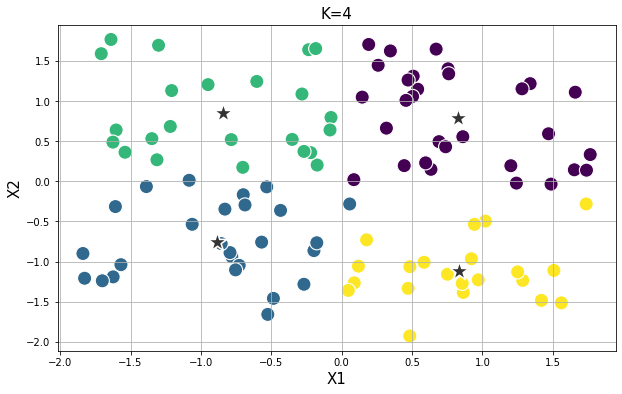

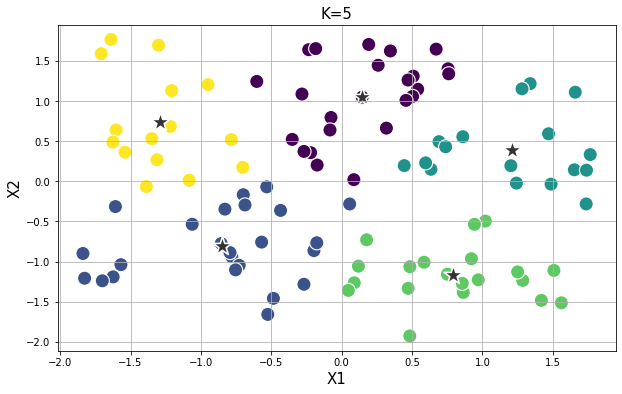

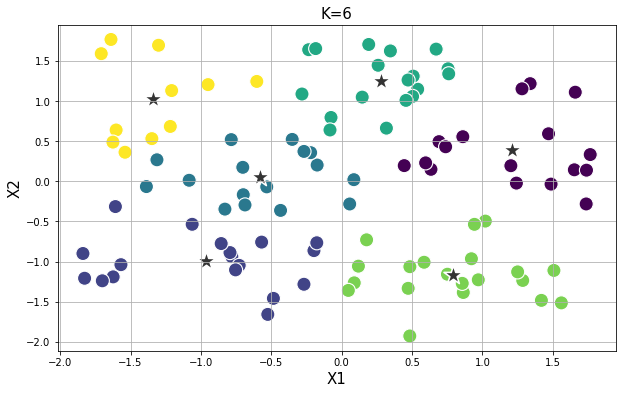

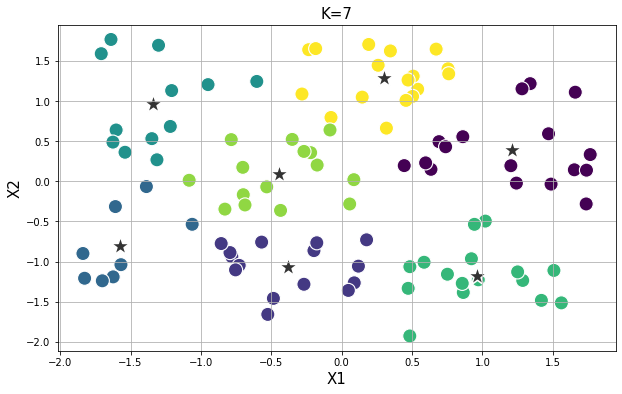

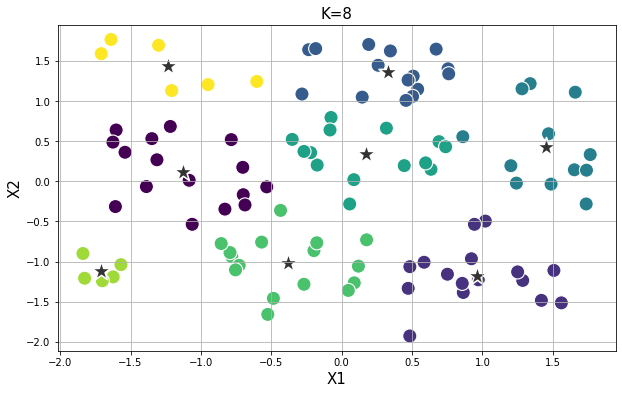

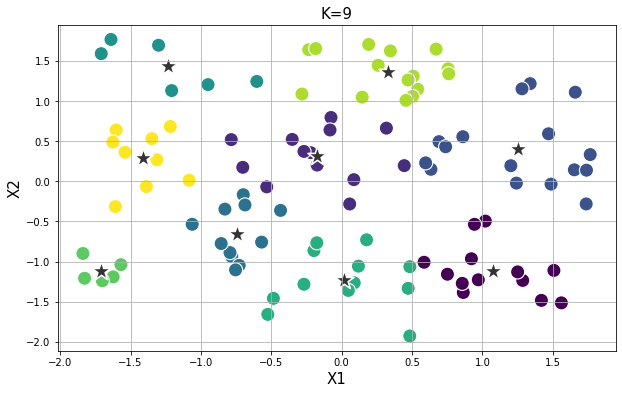

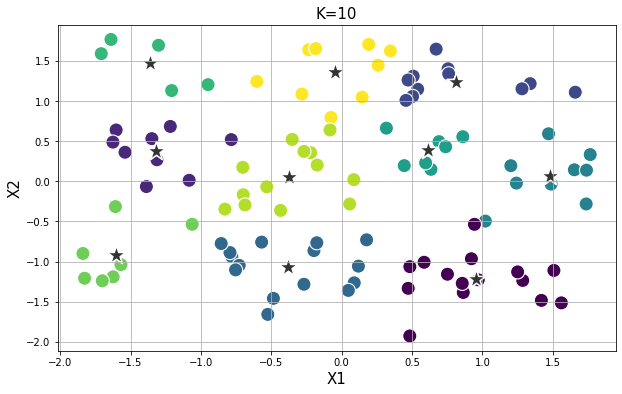

In [16]:
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++')
  kmeans.fit(df_scaled2)
  y_pred2 = kmeans.predict(df_scaled2)
  
  # Creating plot
  plt.figure(figsize=[10,6])
  sns.scatterplot(df_scaled2[:,0], df_scaled2[:,1], c=y_pred2, s=200)
  centers = kmeans.cluster_centers_
  sns.scatterplot(centers[:,0],centers[:,1],color='.2',marker='*',s=400)
  plt.grid()
  plt.title('K='+str(i),fontsize=15)
  plt.xlabel('X1',fontsize=15)
  plt.ylabel('X2',fontsize=15)
  plt.show()

In [17]:
# Calculate SSE
SSE_q2b_inbuilt=[]
n=11
for i in range(1,n):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(df_scaled2)
    SSE_q2b_inbuilt.append(kmeans.inertia_)

#Q2b 4) Plot elbow curve

Text(0.5, 1.0, 'Elbow Curve')

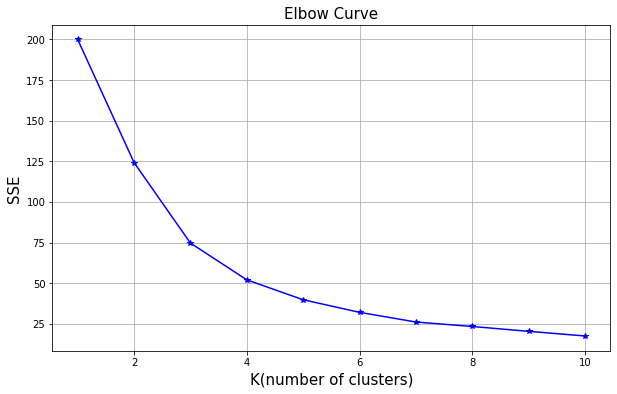

In [18]:
x_axis=np.arange(1,11)
plt.figure(figsize=[10,6])
plt.plot(x_axis,SSE_q2b_inbuilt,'b-*')
plt.grid()
plt.ylabel('SSE',fontsize=15)
plt.xlabel('K(number of clusters)',fontsize=15)
plt.title('Elbow Curve',fontsize=15)

# Q3

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
data = pd.read_csv('dataset3.csv')
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

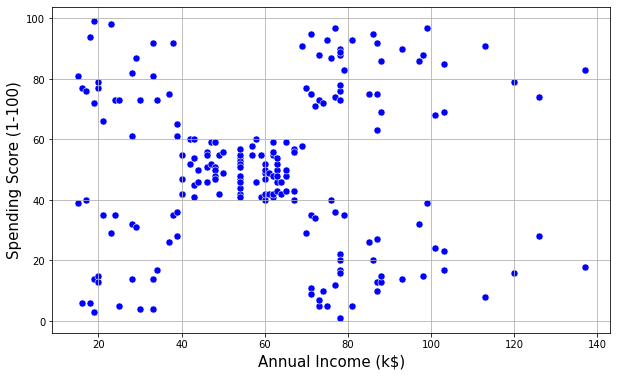

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], color='b', s=50)
plt.xlabel('Annual Income (k$)',fontsize=15)
plt.ylabel('Spending Score (1-100)',fontsize=15)
plt.grid() 

# Annual Income and Spending Score

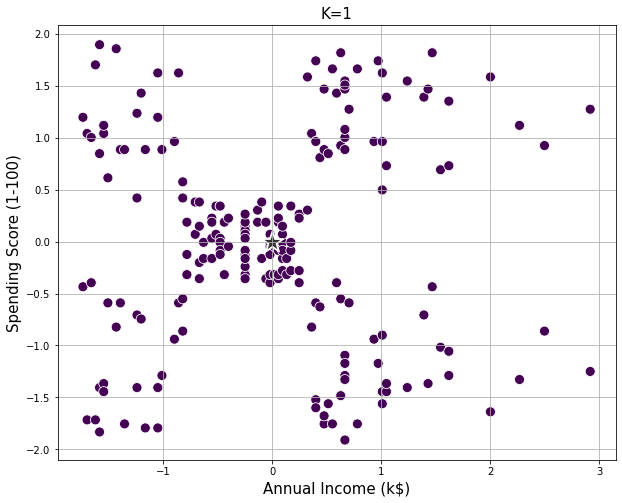

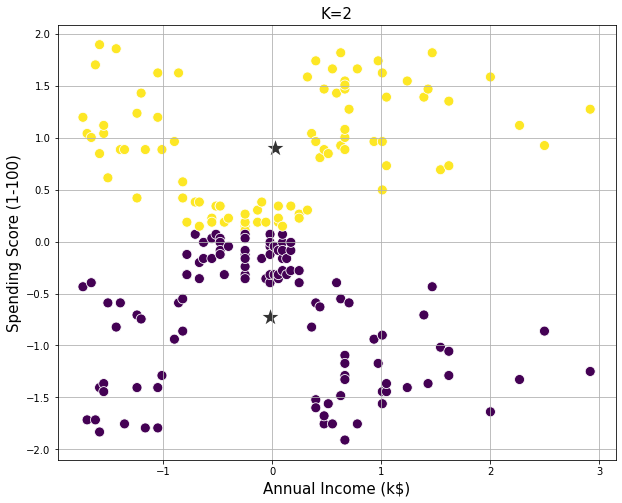

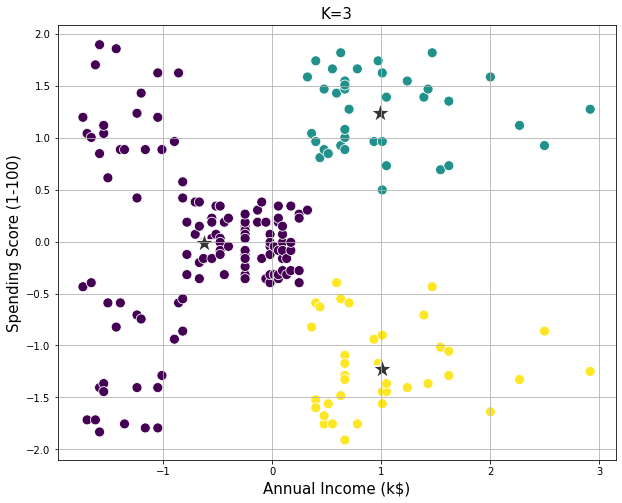

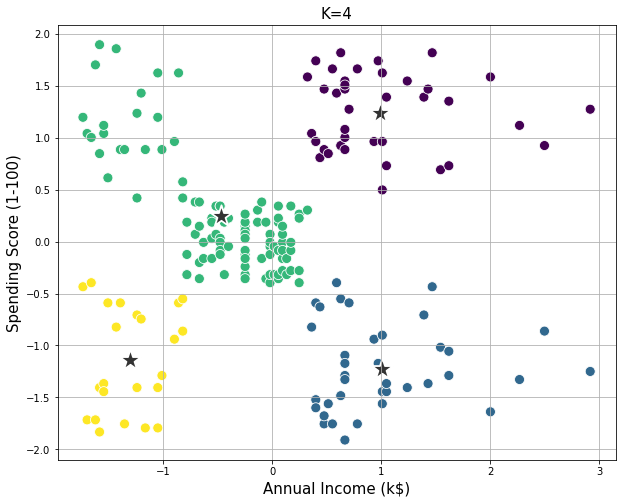

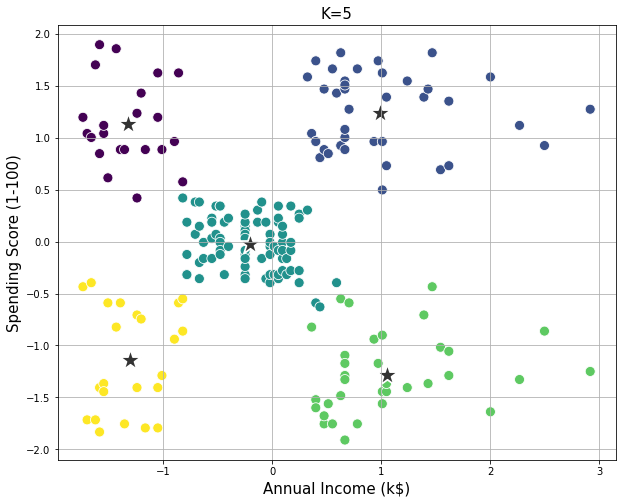

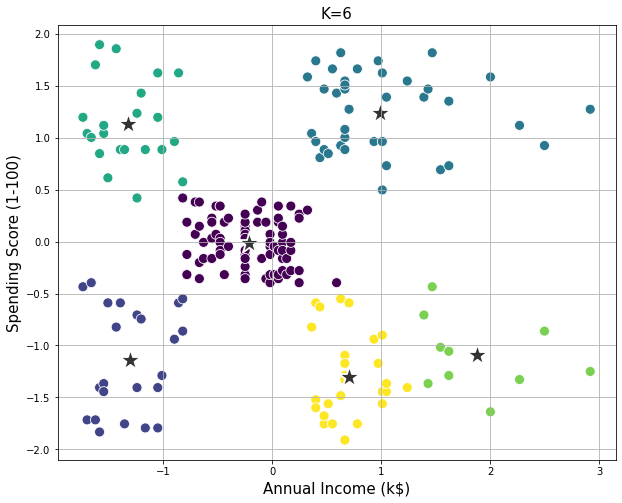

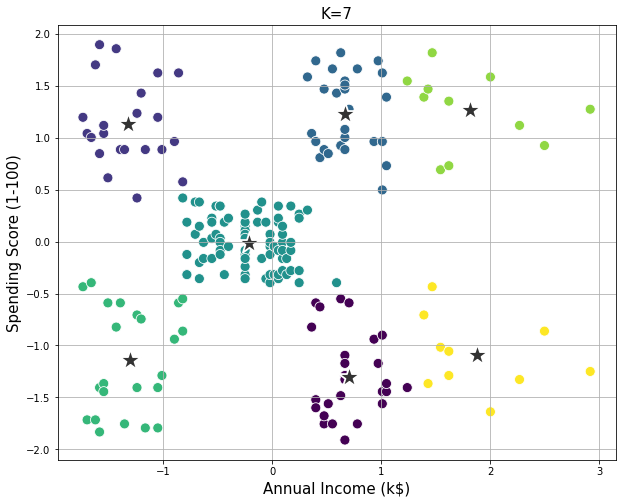

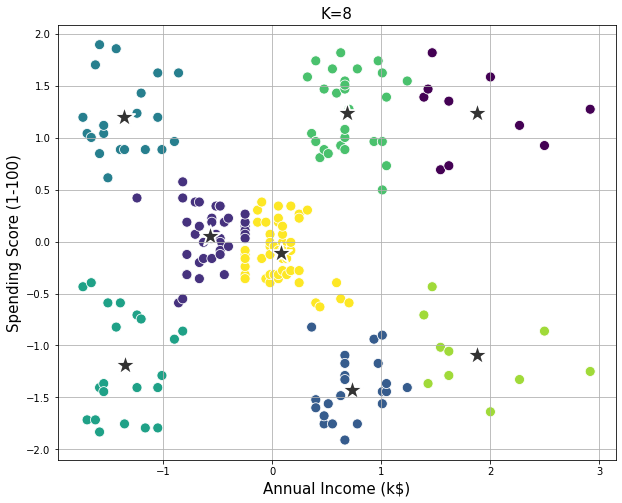

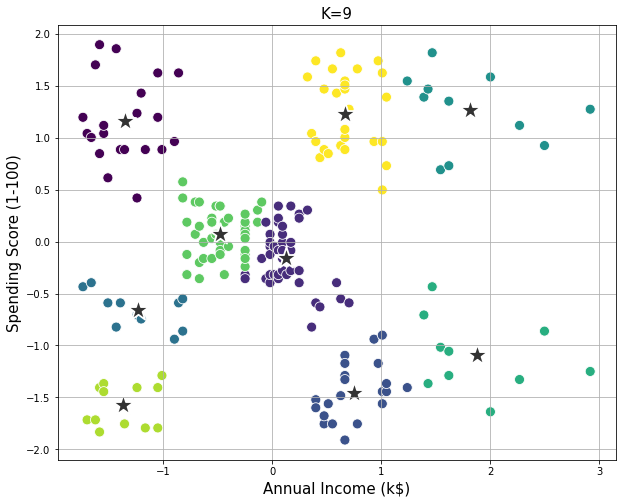

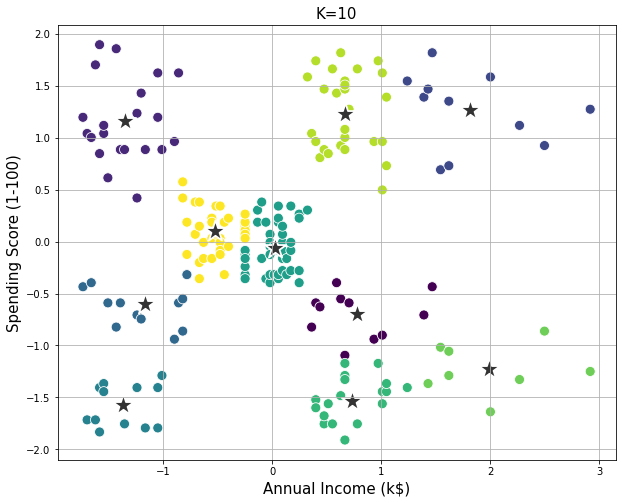

In [9]:
df=[]
df.append(data['Annual Income (k$)'])
df.append(data['Spending Score (1-100)'])
df=np.array(df).transpose()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

k_set = [int(i) for i in range(1,11)]

for k in k_set:
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df_scaled)
    y_pred = kmeans.predict(df_scaled)
    
    plt.figure(figsize=[10,8])
    sns.scatterplot(x=df_scaled[:,0], y=df_scaled[:,1], c=y_pred, s=100)
    centers = kmeans.cluster_centers_
    sns.scatterplot(x=centers[:,0], y=centers[:,1], color='.2', marker='*', s=500)
    plt.grid()
    plt.title('K='+str(k),fontsize=15)
    plt.xlabel('Annual Income (k$)',fontsize=15)
    plt.ylabel('Spending Score (1-100)',fontsize=15)
    plt.show()

Text(0.5, 1.0, 'Elbow Curve')

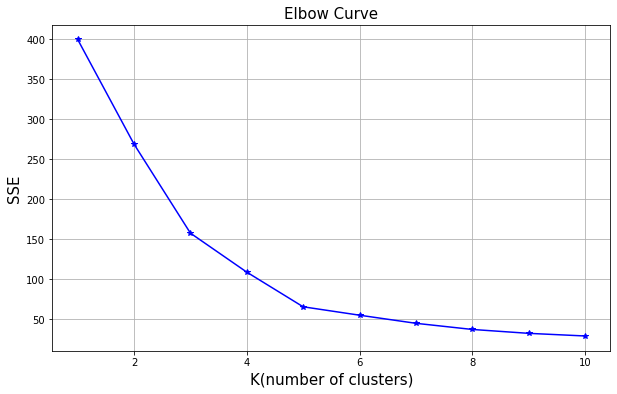

In [10]:
SSE = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)
    
x_axis = np.arange(1,11)
plt.figure(figsize=[10,6])
plt.plot(x_axis, SSE, 'b-*')
plt.grid()
plt.ylabel('SSE', fontsize=15)
plt.xlabel('K(number of clusters)', fontsize=15)
plt.title('Elbow Curve', fontsize=15)

# Age and Spending

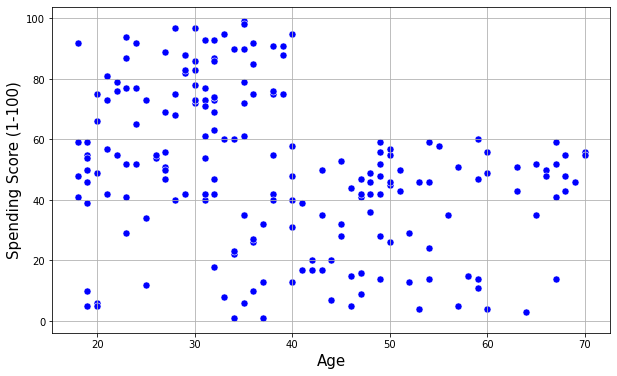

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Age'], y=data['Spending Score (1-100)'], color='b', s=50)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Spending Score (1-100)',fontsize=15)
plt.grid() 

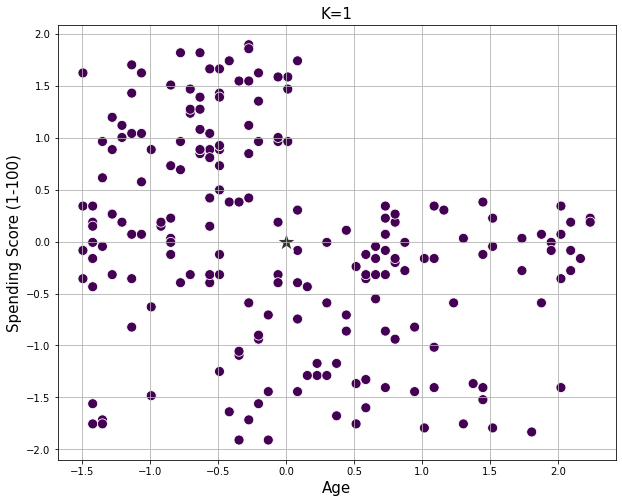

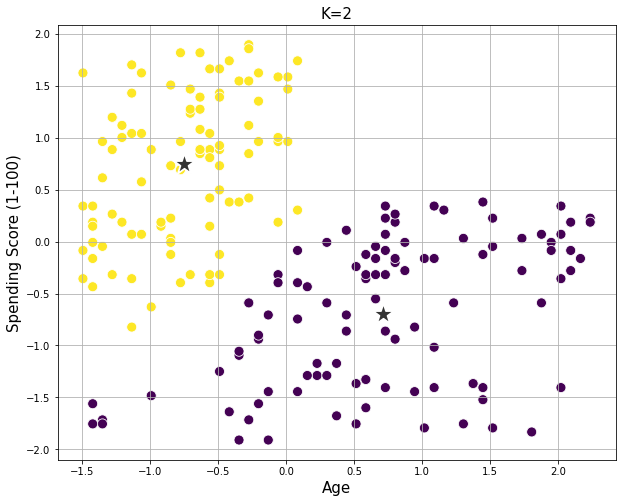

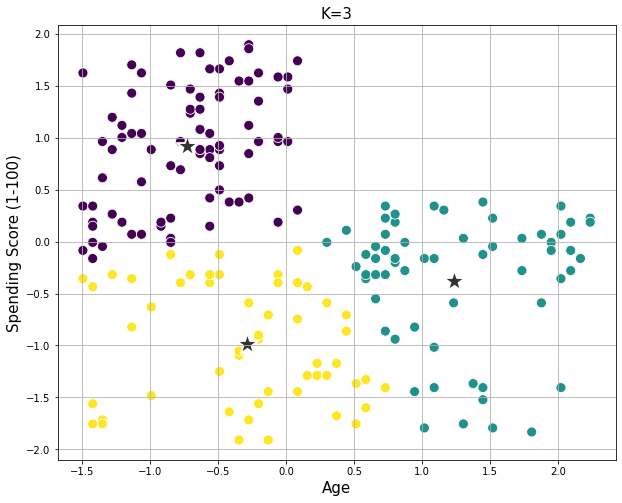

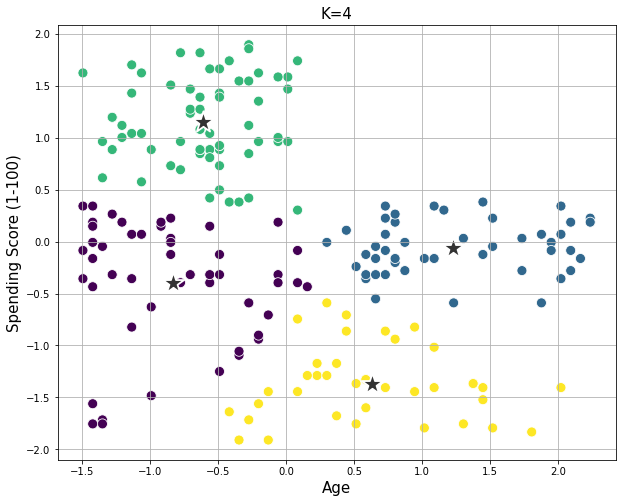

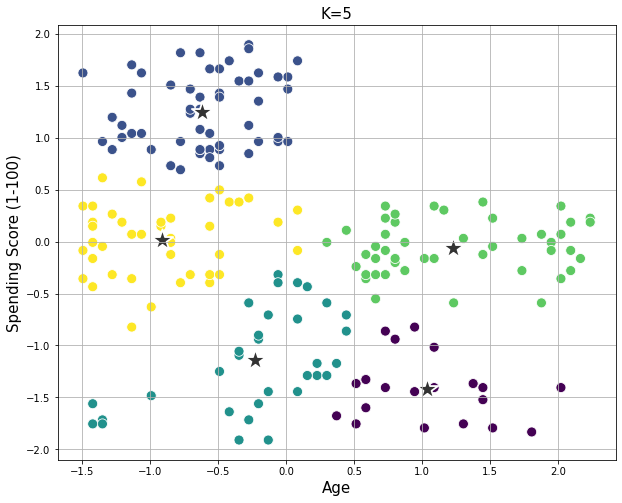

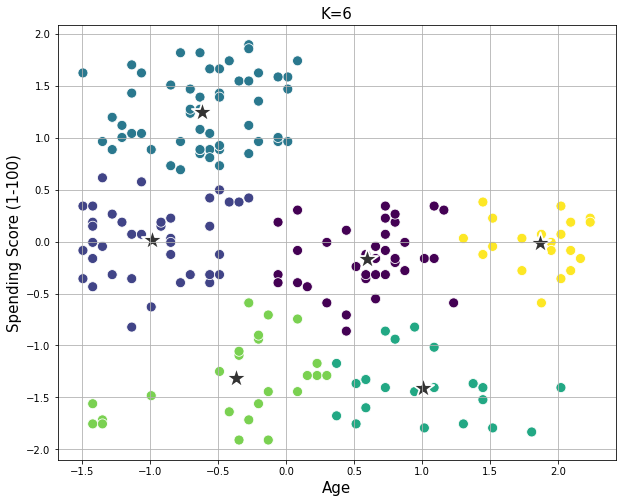

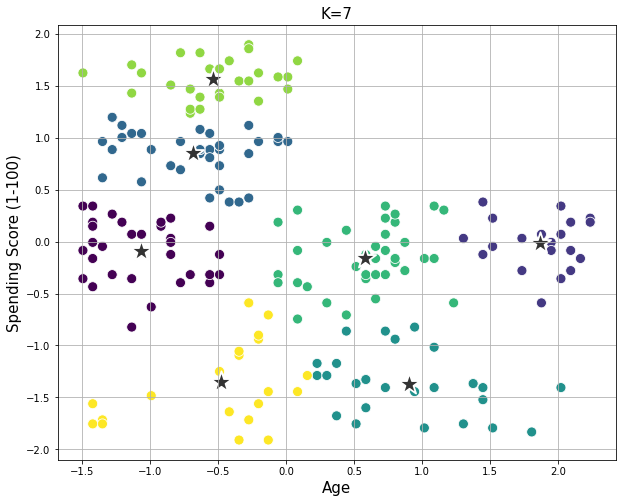

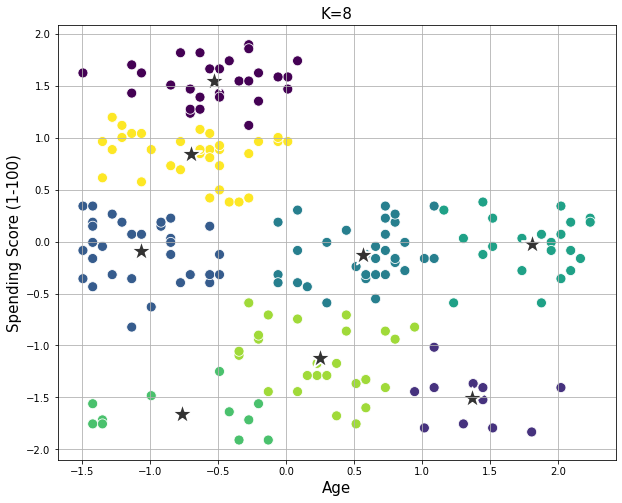

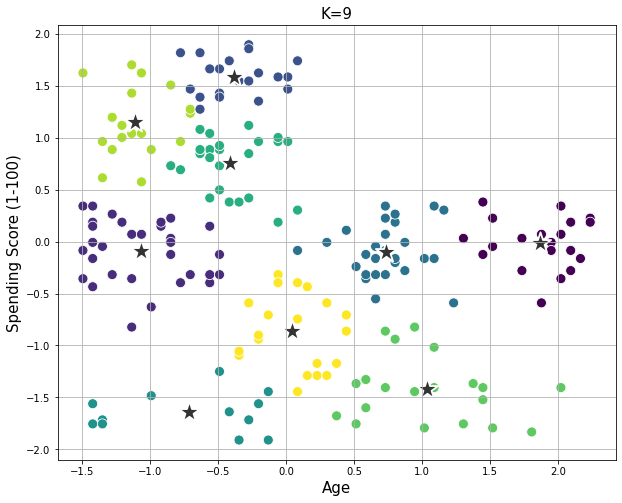

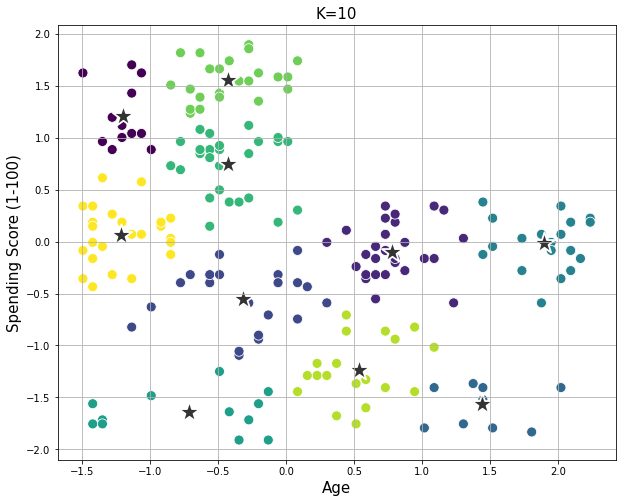

In [12]:
df=[]
df.append(data['Age'])
df.append(data['Spending Score (1-100)'])
df=np.array(df).transpose()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

k_set = [int(i) for i in range(1,11)]

for k in k_set:
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df_scaled)
    y_pred = kmeans.predict(df_scaled)
    
    plt.figure(figsize=[10,8])
    sns.scatterplot(x=df_scaled[:,0], y=df_scaled[:,1], c=y_pred, s=100)
    centers = kmeans.cluster_centers_
    sns.scatterplot(x=centers[:,0], y=centers[:,1], color='.2', marker='*', s=500)
    plt.grid()
    plt.title('K='+str(k),fontsize=15)
    plt.xlabel('Age',fontsize=15)
    plt.ylabel('Spending Score (1-100)',fontsize=15)
    plt.show()

Text(0.5, 1.0, 'Elbow Curve')

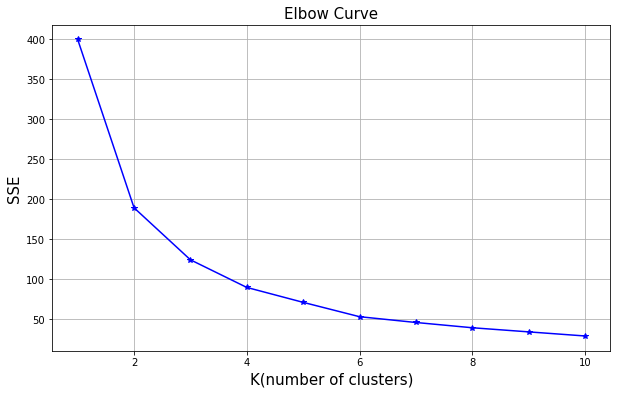

In [13]:
SSE = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)
    
x_axis = np.arange(1,11)
plt.figure(figsize=[10,6])
plt.plot(x_axis, SSE, 'b-*')
plt.grid()
plt.ylabel('SSE', fontsize=15)
plt.xlabel('K(number of clusters)', fontsize=15)
plt.title('Elbow Curve', fontsize=15)

# Age and Annual Income

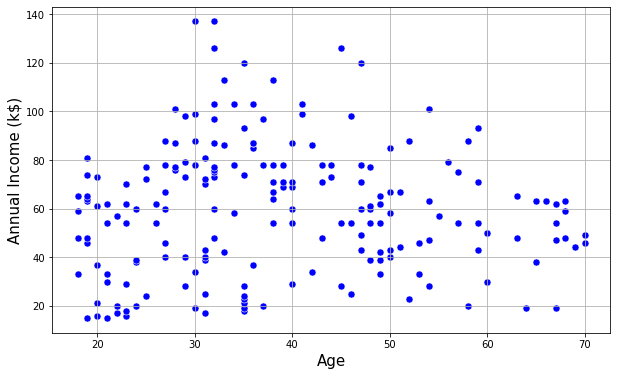

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Age'], y=data['Annual Income (k$)'], color='b', s=50)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Annual Income (k$)',fontsize=15)
plt.grid() 

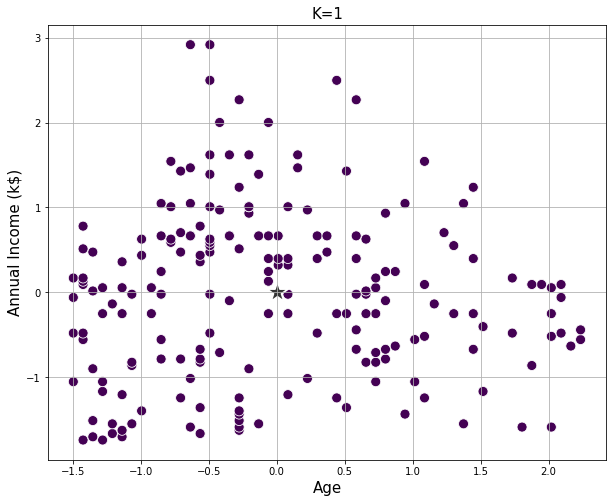

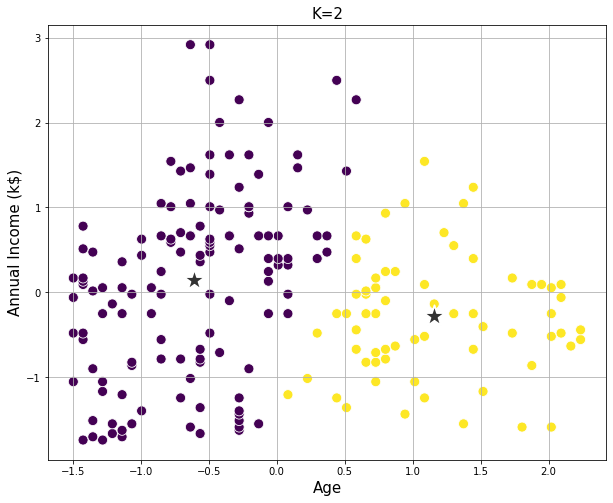

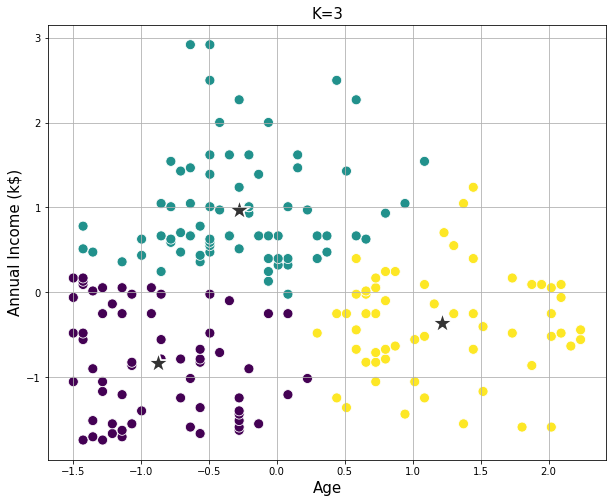

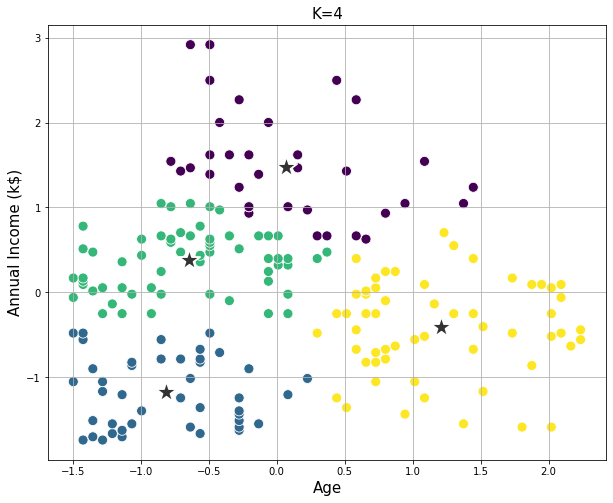

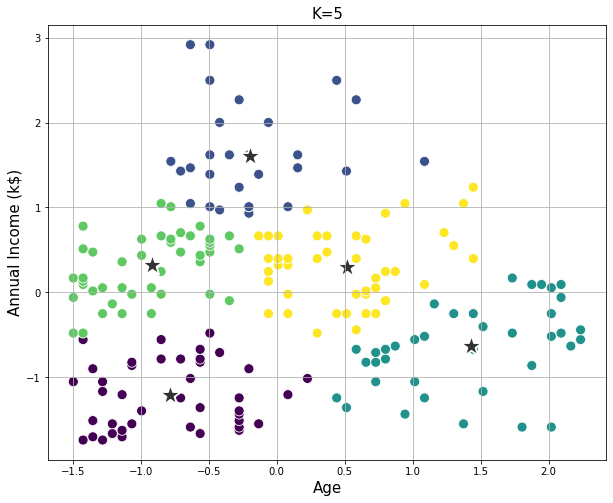

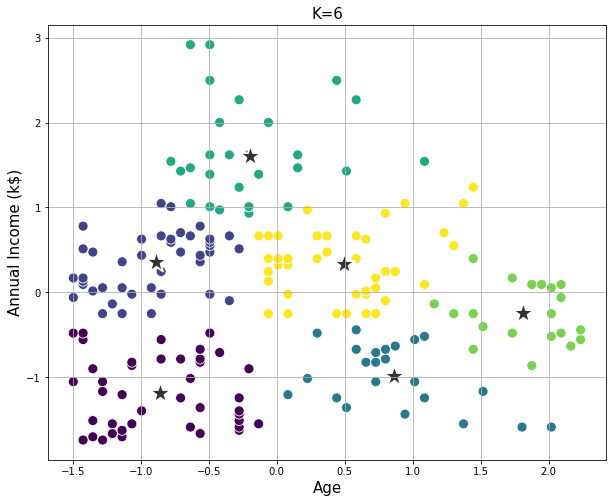

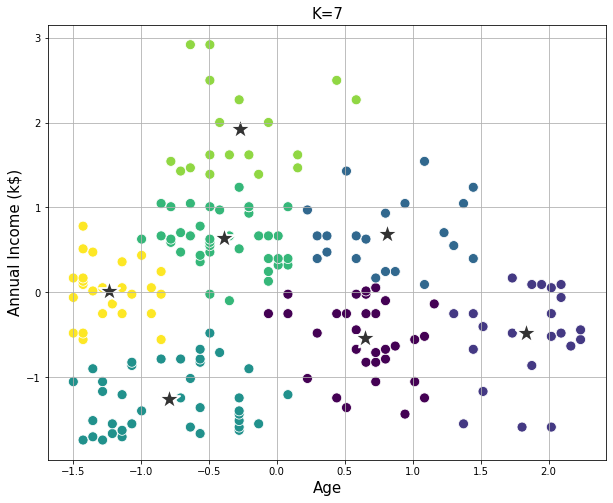

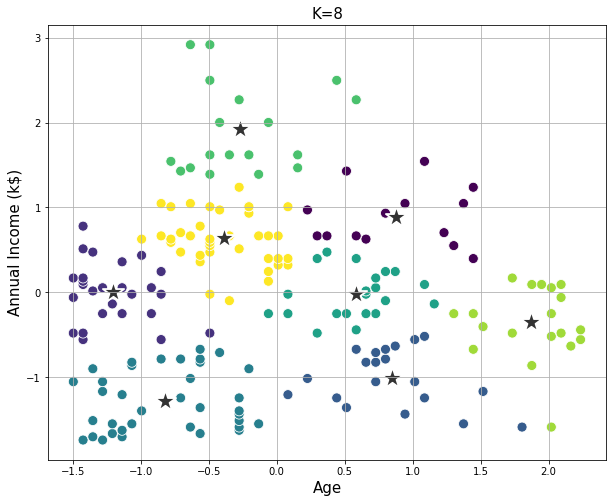

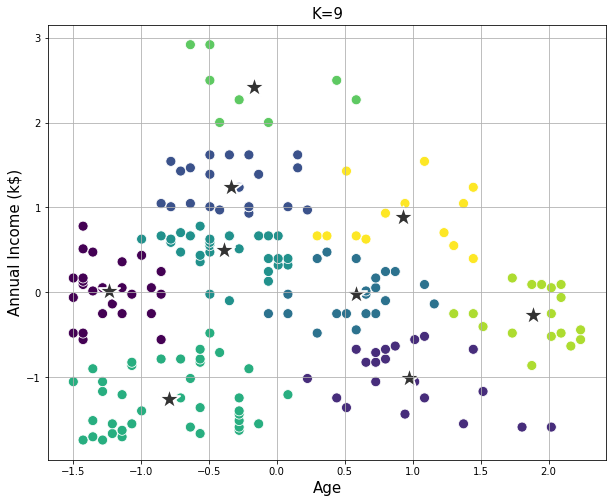

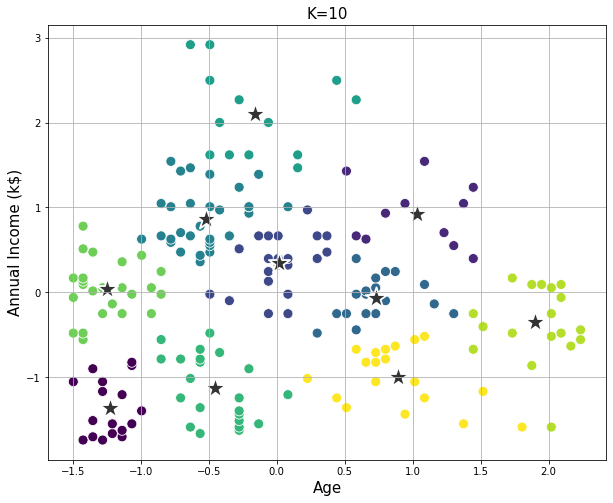

In [15]:
df=[]
df.append(data['Age'])
df.append(data['Annual Income (k$)'])
df=np.array(df).transpose()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

k_set = [int(i) for i in range(1,11)]

for k in k_set:
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df_scaled)
    y_pred = kmeans.predict(df_scaled)
    
    plt.figure(figsize=[10,8])
    sns.scatterplot(x=df_scaled[:,0], y=df_scaled[:,1], c=y_pred, s=100)
    centers = kmeans.cluster_centers_
    sns.scatterplot(x=centers[:,0], y=centers[:,1], color='.2', marker='*', s=500)
    plt.grid()
    plt.title('K='+str(k),fontsize=15)
    plt.xlabel('Age',fontsize=15)
    plt.ylabel('Annual Income (k$)',fontsize=15)
    plt.show()

Text(0.5, 1.0, 'Elbow Curve')

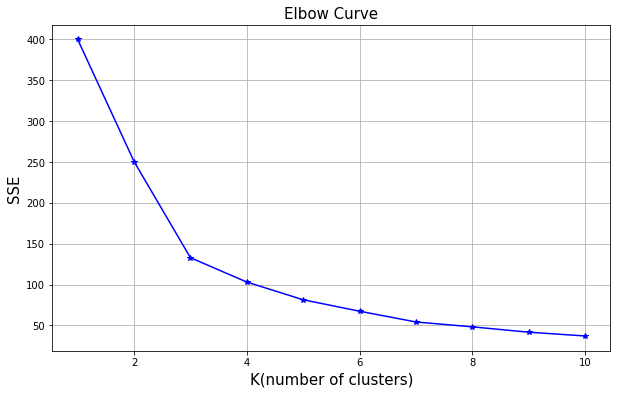

In [16]:
SSE = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)
    
x_axis = np.arange(1,11)
plt.figure(figsize=[10,6])
plt.plot(x_axis, SSE, 'b-*')
plt.grid()
plt.ylabel('SSE', fontsize=15)
plt.xlabel('K(number of clusters)', fontsize=15)
plt.title('Elbow Curve', fontsize=15)

# Gender and {Annual Income, Spending Score}

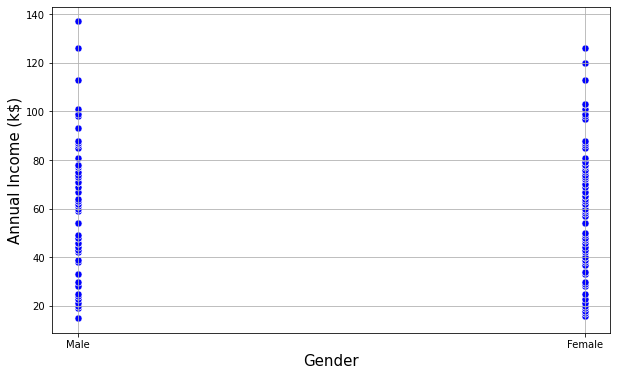

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Gender'], y=data['Annual Income (k$)'], color='b', s=50)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Annual Income (k$)',fontsize=15)
plt.grid() 

In [18]:
print(np.mean(data[data['Gender']=='Male']['Annual Income (k$)']))
print(np.std(data[data['Gender']=='Male']['Annual Income (k$)']))

62.22727272727273
26.486586344758496


In [19]:
print(np.mean(data[data['Gender']=='Female']['Annual Income (k$)']))
print(np.std(data[data['Gender']=='Female']['Annual Income (k$)']))

59.25
25.8955663607278


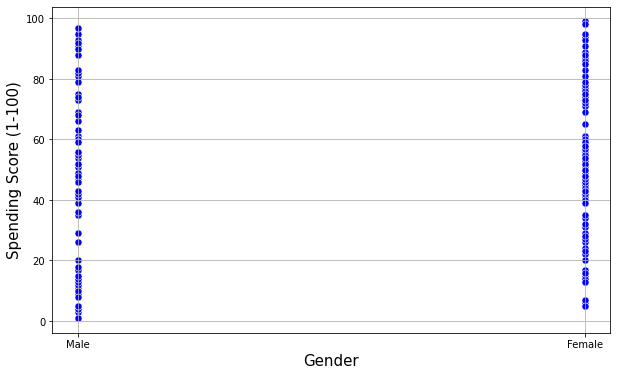

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Gender'], y=data['Spending Score (1-100)'], color='b', s=50)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Spending Score (1-100)',fontsize=15)
plt.grid() 

In [21]:
print(np.mean(data[data['Gender']=='Male']['Spending Score (1-100)']))
print(np.std(data[data['Gender']=='Male']['Spending Score (1-100)']))

48.51136363636363
27.737812359739767


In [22]:
print(np.mean(data[data['Gender']=='Female']['Spending Score (1-100)']))
print(np.std(data[data['Gender']=='Female']['Spending Score (1-100)']))

51.526785714285715
24.00705246880166
